<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/RNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('RSCCASN.csv',parse_dates = True,index_col = 'DATE') # Date is read as date object

<Axes: xlabel='DATE'>

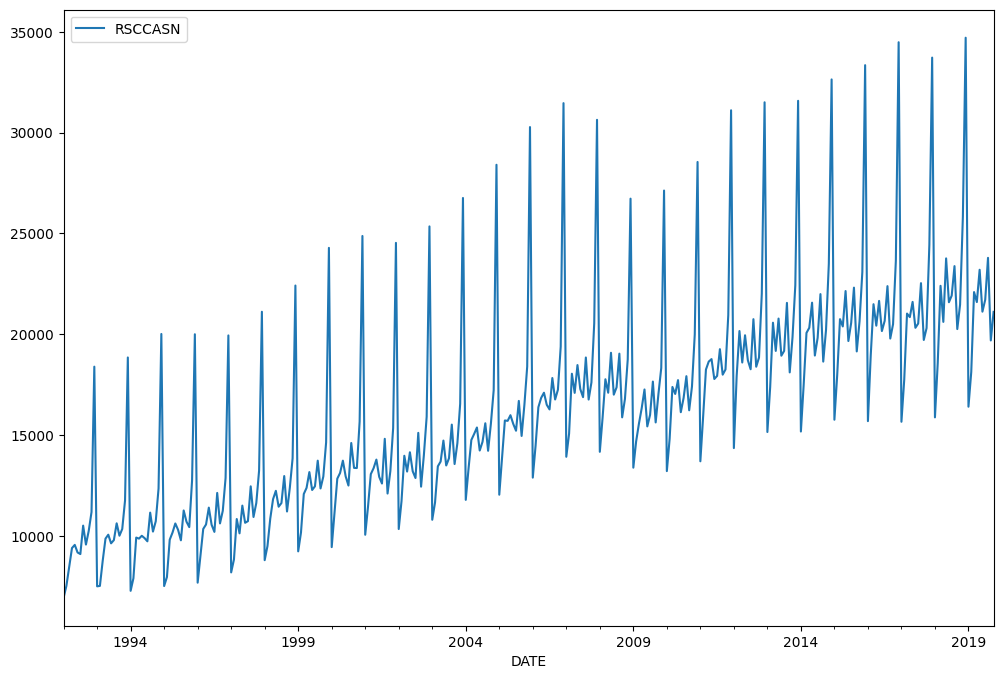

In [7]:
df.plot(figsize=(12,8))

In [8]:
test_size = 18 # 18 months
test_ind = len(df)-test_size

In [9]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train)

MinMaxScaler()

In [14]:
scaled_train = scaler.transform(train)

In [15]:
scaled_test = scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
length =12
generator = TimeseriesGenerator(scaled_train,scaled_train,length =length,batch_size =1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [22]:
n_features =1

In [24]:
model = Sequential()

model.add(LSTM(100,activation ='relu',input_shape =(length,n_features)))

model.add(Dense(1))

model.compile(optimizer ='adam',loss = 'mse')




In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor ='val_loss',patience =2)

In [27]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length,batch_size =1)

In [28]:
model.fit_generator(generator,epochs =20,validation_data = validation_generator,callbacks =[early_stop])

Epoch 1/20


<ipython-input-28-075982ea365d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs =20,validation_data = validation_generator,callbacks =[early_stop])


304/304 [==============================] - 4s 9ms/step - loss: 0.0263 - val_loss: 0.0063
Epoch 2/20
304/304 [==============================] - 3s 8ms/step - loss: 0.0181 - val_loss: 0.0394
Epoch 3/20
304/304 [==============================] - 4s 14ms/step - loss: 0.0102 - val_loss: 0.0016
Epoch 4/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0038 - val_loss: 3.0070e-04
Epoch 5/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0022 - val_loss: 3.6712e-04
Epoch 6/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0018 - val_loss: 7.6795e-04


In [29]:
losses = pd.DataFrame(model.history.history)

<Axes: >

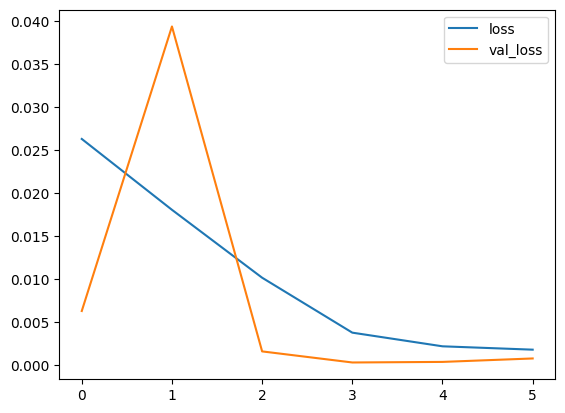

In [30]:
losses.plot()

In [31]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis =1)

1/1 [==============================] - 0s 21ms/step


In [32]:
true_predictions = scaler.inverse_transform(test_predictions)

In [33]:
test['Predictions'] = true_predictions

<ipython-input-33-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

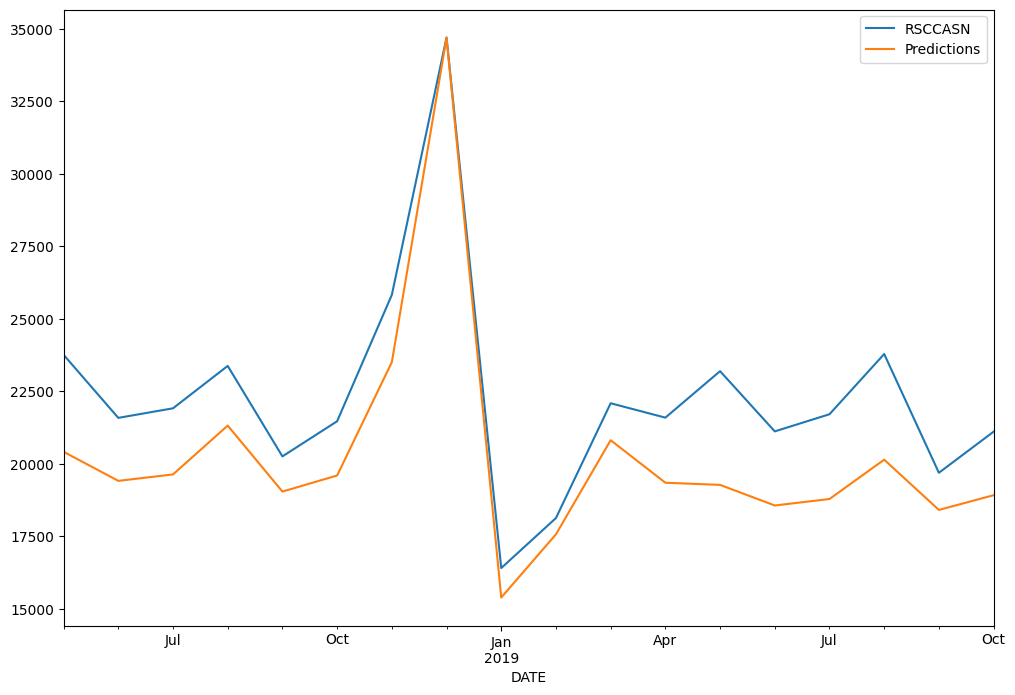

In [35]:
test.plot(figsize =(12,8))

In [36]:
full_scaler = MinMaxScaler()

In [37]:
scaled_full_data = full_scaler.fit_transform(df)

In [38]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length,batch_size =1)

In [40]:
model = Sequential()

model.add(LSTM(100,activation ='relu',input_shape = (length,n_features)))
model.add(Dense(1))

model.compile(optimizer ='adam',loss ='mse')

model.fit_generator(generator,epochs = 8)

Epoch 1/8


<ipython-input-40-99e48ee5a5e8>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs = 8)


322/322 [==============================] - 4s 8ms/step - loss: 0.0254
Epoch 2/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0182
Epoch 3/8
322/322 [==============================] - 4s 13ms/step - loss: 0.0142
Epoch 4/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0077
Epoch 5/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0028
Epoch 6/8
322/322 [==============================] - 4s 11ms/step - loss: 0.0023
Epoch 7/8
322/322 [==============================] - 3s 11ms/step - loss: 0.0017
Epoch 8/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0021


In [41]:
forecast =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(12):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis =1)

1/1 [==============================] - 0s 24ms/step


In [42]:
forecast = scaler.inverse_transform(forecast)

In [43]:
#adding time stamps to forecast
forecast_index = pd.date_range(start ='2019-11-01',periods =12,freq = "MS")

In [44]:
forecast_df = pd.DataFrame(data = forecast,index = forecast_index,columns =['Forecast'])

<Axes: >

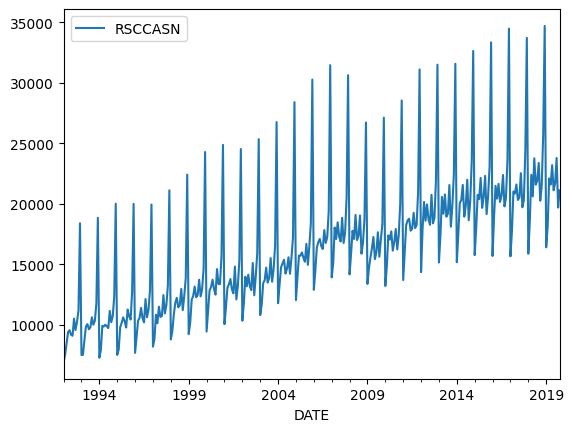

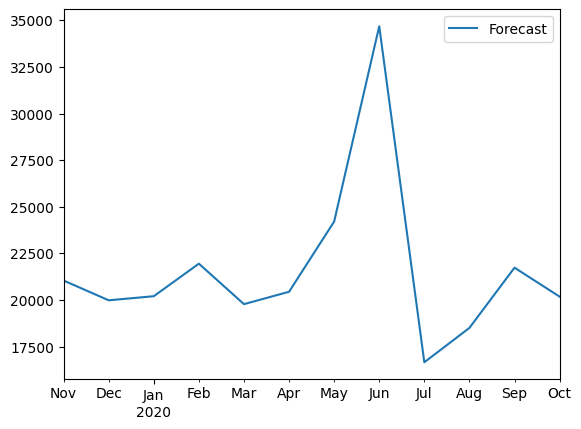

In [47]:
df.plot()
forecast_df.plot()

<Axes: xlabel='DATE'>

<Figure size 1200x800 with 0 Axes>

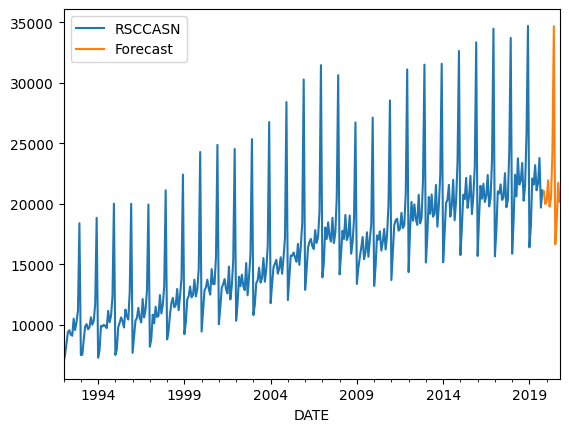

In [49]:
plt.figure(figsize =(12,8))
ax = df.plot()
forecast_df.plot(ax =ax)